In [7]:
import re
import datetime
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [8]:
def store_pickles(filename, to_store):
    with open(filename, 'w') as f:
        pickle.dump(to_store, f)
        
def eat_pickles(filename):
    with open(filename, 'r') as f:
        return pickle.load(f)

In [211]:
df = pd.read_csv('moviedata2015_a.csv', names=['BOM_url', 'Title', 'Domestic_Total_Gross', \
                                             'Release_Date', 'UK_Total_Gross', 'Actors', 'Country', 'British'],)

In [212]:
df_2 = df[['Title', 'Domestic_Total_Gross', 'UK_Total_Gross', 'Actors', 'Country', 'British']]

In [213]:
df_no_UK_ = df_2[df_2["Country"] != 'UK']

In [284]:
test_list = []
 
for country in df_no_UK['Country'].values:
    try:
        test_list.append(country.split(','))
    except:
        test_list.append([])

In [285]:
boolean_val = []

for country in test_list:
    if 'USA' in country:
        boolean_val.append(True)
    else:
        boolean_val.append(False)

In [ ]:
df_US = df_no_UK[boolean_val]  

In [294]:
df_US = df_US[df_US['UK_Total_Gross'] > 250000]

In [371]:
#df_US = df_US.drop(1917)
#df_US = df_US.drop(164)
#df_US = df_US.drop(472)
#df_US = df_US.drop(818)
#df_US = df_US.drop(945)

In [360]:
#df_non_avataar = df_US.drop(1913)
#df_US[df_US['Domestic_Total_Gross'].isnull()]
#missing_gross = [26213520, 0, 165982915, 17113323, 31338504, 128002372, 0, 0, 22348241, 18562800, 64460211, \
#                37862911, 53659191, 42340598, 121245304, 17266000, 13092000, 187178992, 250863268, 47248274, \
#                47842467, 10219501, 79348835]
#indices = df_US[df_US['Domestic_Total_Gross'].isnull()].index

In [361]:
#for i in range(len(indices)):
#    df_US.loc[indices[i], 'Domestic_Total_Gross'] = missing_gross[i]

In [346]:
#df_US.loc[20, 'Domestic_Total_Gross'] = 222404450
#df_US.loc[26, 'Domestic_Total_Gross'] = 83320932
#df_US.loc[79, 'Domestic_Total_Gross'] = 35916045
#df_US.loc[237, 'Domestic_Total_Gross'] = 161756387
#df_US.loc[46, 'Domestic_Total_Gross'] = 83320932
#df_US.loc[79, 'Domestic_Total_Gross']

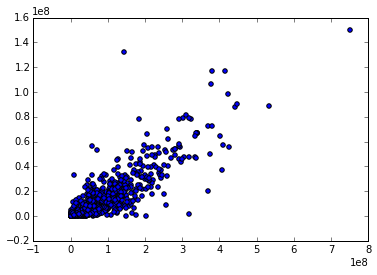

In [27]:
plt.scatter(US_final['Domestic_Total_Gross'], US_final['UK_Total_Gross'])

In [465]:
smf.ols("np.log(UK_Total_Gross) ~ np.log(Domestic_Total_Gross) + British", df_US).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(UK_Total_Gross)   R-squared:                       0.546
Model:                                OLS   Adj. R-squared:                  0.545
Method:                     Least Squares   F-statistic:                     780.0
Date:                    Wed, 22 Apr 2015   Prob (F-statistic):          3.90e-223
Time:                            20:07:37   Log-Likelihood:                -1724.5
No. Observations:                    1300   AIC:                             3455.
Df Residuals:                        1297   BIC:                             3471.
Df Model:                               2                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        2.7503      0.323      8.517      0.000         2.117     3.384
np.log(Domestic_Total_Gross)     0.7159      0.018     38.723      0.000         0.680     0.752
British                          0.3080      0.053      5.786      0.000         0.204     0.412
==============================================================================
Omnibus:                       63.183   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.116
Skew:                          -0.234   Prob(JB):                     6.26e-36
Kurtosis:                       4.666   Cond. No.                         224.
==============================================================================
"""

In [456]:
genre_df.columns = ['Budget', 'Genre', 'Title']

In [458]:
US_df = df_test.merge(genre_df)

In [28]:
smf.ols("np.log(UK_Total_Gross) ~ np.log(Domestic_Total_Gross) + Genres + np.log(Budget) + British", US_final).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(UK_Total_Gross)   R-squared:                       0.997
Model:                                OLS   Adj. R-squared:                  0.997
Method:                     Least Squares   F-statistic:                 1.933e+04
Date:                    Thu, 23 Apr 2015   Prob (F-statistic):               0.00
Time:                            11:47:08   Log-Likelihood:                -1195.0
No. Observations:                    1010   AIC:                             2430.
Df Residuals:                         990   BIC:                             2528.
Df Model:                              20                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       -2.1371      0.554     -3.856      0.000        -3.225    -1.050
Genres[T.Adventure]              0.2282      0.120      1.898      0.058        -0.008     0.464
Genres[T.Animation]              0.3705      0.108      3.425      0.001         0.158     0.583
Genres[T.Comedy]                 0.0328      0.081      0.407      0.684        -0.125     0.191
Genres[T.Concert]                0.7776      0.570      1.364      0.173        -0.341     1.896
Genres[T.Crime]                  0.4773      0.465      1.027      0.304        -0.434     1.389
Genres[T.Documentary]           -0.0863      0.340     -0.254      0.800        -0.754     0.581
Genres[T.Drama]                 -0.0090      0.091     -0.099      0.921        -0.188     0.169
Genres[T.Epic]                   0.7334      0.568      1.291      0.197        -0.381     1.848
Genres[T.Family]                 0.0709      0.332      0.214      0.831        -0.580     0.722
Genres[T.Fantasy]                0.0882      0.182      0.486      0.627        -0.268     0.445
Genres[T.Horror]                 0.1467      0.110      1.330      0.184        -0.070     0.363
Genres[T.IMAX]               -1.803e-16   1.77e-16     -1.021      0.308     -5.27e-16  1.66e-16
Genres[T.Romance]                0.3349      0.175      1.917      0.055        -0.008     0.678
Genres[T.Sci-Fi]                 0.1022      0.307      0.332      0.740        -0.501     0.705
Genres[T.Thriller]              -0.0033      0.106     -0.032      0.975        -0.211     0.204
Genres[T.War]                    0.0595      0.307      0.194      0.846        -0.543     0.663
Genres[T.Western]                0.2543      0.362      0.703      0.482        -0.456     0.964
np.log(Domestic_Total_Gross)     0.9266      0.029     31.565      0.000         0.869     0.984
np.log(Budget)                   0.0620      0.028      2.228      0.026         0.007     0.117
British                          0.2606      0.057      4.597      0.000         0.149     0.372
==============================================================================
Omnibus:                      137.056   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.464
Skew:                          -0.753   Prob(JB):                     5.76e-71
Kurtosis:                       5.327   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is -6.77e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [485]:
US_df_final.to_csv('US_final.csv')

In [472]:
title_genre = eat_pickles('title_genre.pkl')

In [473]:
df_title_genre = pd.DataFrame(title_genre)

In [476]:
#df_title_genre
del US_df['Genre']

In [479]:
US_df_final = US_df.merge(df_title_genre)

In [13]:
US_final = pd.read_csv('US_final.csv')

In [16]:
smf.ols("UK_Total_Gross ~ Domestic_Total_Gross + Genres + Budget + British", US_final).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UK_Total_Gross   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     228.3
Date:                Thu, 23 Apr 2015   Prob (F-statistic):               0.00
Time:                        10:41:01   Log-Likelihood:                -17529.
No. Observations:                1010   AIC:                         3.510e+04
Df Residuals:                     990   BIC:                         3.520e+04
Df Model:                          20                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept             -5.002e+06   8.71e+05     -5.745      0.000     -6.71e+06 -3.29e+06
Genres[T.Adventure]    4.031e+06   1.28e+06      3.160      0.002      1.53e+06  6.53e+06
Genres[T.Animation]    6.442e+06   1.15e+06      5.615      0.000      4.19e+06  8.69e+06
Genres[T.Comedy]       2.011e+06   8.75e+05      2.298      0.022      2.93e+05  3.73e+06
Genres[T.Concert]      8.279e+06   6.01e+06      1.376      0.169     -3.52e+06  2.01e+07
Genres[T.Crime]        3.552e+06   4.91e+06      0.724      0.470     -6.08e+06  1.32e+07
Genres[T.Documentary]  1.361e+06   3.54e+06      0.384      0.701     -5.59e+06  8.31e+06
Genres[T.Drama]        2.126e+06   9.75e+05      2.180      0.030      2.12e+05  4.04e+06
Genres[T.Epic]         8.976e+06   6.02e+06      1.492      0.136     -2.83e+06  2.08e+07
Genres[T.Family]       5.202e+06   3.51e+06      1.481      0.139     -1.69e+06  1.21e+07
Genres[T.Fantasy]      5.633e+06   1.92e+06      2.934      0.003      1.87e+06   9.4e+06
Genres[T.Horror]       3.281e+06   1.14e+06      2.866      0.004      1.03e+06  5.53e+06
Genres[T.IMAX]         9.529e-10   1.93e-09      0.494      0.621     -2.83e-09  4.74e-09
Genres[T.Romance]      4.065e+06   1.87e+06      2.177      0.030      4.01e+05  7.73e+06
Genres[T.Sci-Fi]       3.779e+05   3.25e+06      0.116      0.907        -6e+06  6.76e+06
Genres[T.Thriller]     2.119e+06   1.13e+06      1.871      0.062     -1.03e+05  4.34e+06
Genres[T.War]          3.658e+06   3.25e+06      1.127      0.260     -2.71e+06     1e+07
Genres[T.Western]      8.912e+05   3.82e+06      0.233      0.816     -6.61e+06  8.39e+06
Domestic_Total_Gross      0.1634      0.005     35.351      0.000         0.154     0.172
Budget                    0.0163      0.008      2.055      0.040         0.001     0.032
British                1.879e+06      6e+05      3.132      0.002      7.02e+05  3.06e+06
==============================================================================
Omnibus:                      753.461   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49013.378
Skew:                           2.790   Prob(JB):                         0.00
Kurtosis:                      36.668   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is   -298. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
US_final_lowbudget = US_final[US_final['Budget'] < 100000000]

In [22]:
US_final_highbudget = US_final[US_final['Budget'] >= 100000000]

In [26]:
smf.ols("UK_Total_Gross ~ Domestic_Total_Gross + Genres + Budget + British", US_final_lowbudget).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UK_Total_Gross   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 23 Apr 2015   Prob (F-statistic):          8.95e-130
Time:                        10:50:46   Log-Likelihood:                -14148.
No. Observations:                 820   AIC:                         2.833e+04
Df Residuals:                     801   BIC:                         2.842e+04
Df Model:                          18                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept             -2.845e+06   9.64e+05     -2.950      0.003     -4.74e+06 -9.52e+05
Genres[T.Adventure]    1.211e+06   1.55e+06      0.782      0.434     -1.83e+06  4.25e+06
Genres[T.Animation]    7.471e+06    1.4e+06      5.338      0.000      4.72e+06  1.02e+07
Genres[T.Comedy]       8.354e+05   8.89e+05      0.939      0.348     -9.11e+05  2.58e+06
Genres[T.Concert]      6.496e+06   5.46e+06      1.189      0.235     -4.22e+06  1.72e+07
Genres[T.Crime]        2.739e+06   4.46e+06      0.614      0.539     -6.01e+06  1.15e+07
Genres[T.Documentary]  -1.48e+05   3.24e+06     -0.046      0.964     -6.51e+06  6.22e+06
Genres[T.Drama]        7.781e+05   9.78e+05      0.796      0.426     -1.14e+06   2.7e+06
Genres[T.Family]       4.198e+06    3.2e+06      1.313      0.190     -2.08e+06  1.05e+07
Genres[T.Fantasy]      5.484e+06   2.43e+06      2.253      0.025      7.06e+05  1.03e+07
Genres[T.Horror]       1.703e+06   1.15e+06      1.479      0.140     -5.58e+05  3.96e+06
Genres[T.Romance]      2.721e+06    1.8e+06      1.509      0.132     -8.18e+05  6.26e+06
Genres[T.Sci-Fi]       9.468e+04   4.46e+06      0.021      0.983     -8.66e+06  8.85e+06
Genres[T.Thriller]     4.335e+05   1.11e+06      0.392      0.695     -1.74e+06  2.61e+06
Genres[T.War]           3.32e+06   3.49e+06      0.952      0.341     -3.52e+06  1.02e+07
Genres[T.Western]      2.276e+06   4.46e+06      0.510      0.610     -6.48e+06   1.1e+07
Domestic_Total_Gross      0.1500      0.006     26.413      0.000         0.139     0.161
Budget                    0.0055      0.014      0.405      0.686        -0.021     0.032
British                2.184e+06   6.05e+05      3.612      0.000      9.97e+05  3.37e+06
==============================================================================
Omnibus:                      885.117   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129695.438
Skew:                           4.771   Prob(JB):                         0.00
Kurtosis:                      63.868   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is   -665. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
smf.ols("UK_Total_Gross ~ Domestic_Total_Gross + Genres + Budget + British", US_final_highbudget).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UK_Total_Gross   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     35.93
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           2.45e-45
Time:                        10:47:51   Log-Likelihood:                -3341.4
No. Observations:                 190   AIC:                             6715.
Df Residuals:                     174   BIC:                             6767.
Df Model:                          15                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1.073e+07   3.53e+06     -3.039      0.003     -1.77e+07 -3.76e+06
Genres[T.Adventure]   7.937e+06   2.51e+06      3.162      0.002      2.98e+06  1.29e+07
Genres[T.Animation]   5.502e+06   2.34e+06      2.351      0.020      8.83e+05  1.01e+07
Genres[T.Comedy]      8.136e+06   3.59e+06      2.268      0.025      1.06e+06  1.52e+07
Genres[T.Drama]       7.392e+06   4.16e+06      1.775      0.078     -8.27e+05  1.56e+07
Genres[T.Epic]         1.27e+07   7.94e+06      1.599      0.112     -2.98e+06  2.84e+07
Genres[T.Fantasy]     7.916e+06   3.62e+06      2.185      0.030      7.64e+05  1.51e+07
Genres[T.Horror]      8.902e+06   4.68e+06      1.903      0.059     -3.33e+05  1.81e+07
Genres[T.Romance]     8.722e+06   8.05e+06      1.083      0.280     -7.17e+06  2.46e+07
Genres[T.Sci-Fi]      3.326e+06   5.72e+06      0.581      0.562     -7.97e+06  1.46e+07
Genres[T.Thriller]    1.279e+07   5.71e+06      2.238      0.026      1.51e+06  2.41e+07
Genres[T.War]         5.091e+06    7.9e+06      0.644      0.520     -1.05e+07  2.07e+07
Genres[T.Western]    -1.214e+06    7.9e+06     -0.154      0.878     -1.68e+07  1.44e+07
Domestic_Total_Gross     0.1808      0.009     19.568      0.000         0.163     0.199
Budget                   0.0339      0.023      1.449      0.149        -0.012     0.080
British              -3.692e+05   1.86e+06     -0.198      0.843     -4.05e+06  3.31e+06
==============================================================================
Omnibus:                       23.353   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.405
Skew:                           0.004   Prob(JB):                     1.18e-26
Kurtosis:                       6.884   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is   -482. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""